# About Dataset

**Description**

Prognostics and health management is an important topic in industry for predicting state of assets to avoid downtime and failures. This data set is the Kaggle version of the very well known public data set for asset degradation modeling from NASA. It includes Run-to-Failure simulated data from turbo fan jet engines.

Engine degradation simulation was carried out using C-MAPSS. Four different were sets simulated under different combinations of operational conditions and fault modes. Records several sensor channels to characterize fault evolution. The data set was provided by the Prognostics CoE at NASA Ames.

**Prediction Goal**

In this dataset the goal is to predict the remaining useful life (RUL) of each engine in the test dataset. RUL is equivalent of number of flights remained for the engine after the last datapoint in the test dataset.

**Experimental Scenario**

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. There are three operational settings that have a substantial effect on engine performance. These settings are also included in the data. The data is contaminated with sensor noise.

The engine is operating normally at the start of each time series, and develops a fault at some point during the series. In the training set, the fault grows in magnitude until system failure. In the test set, the time series ends some time prior to system failure. The objective of the competition is to predict the number of remaining operational cycles before failure in the test set, i.e., the number of operational cycles after the last cycle that the engine will continue to operate. Also provided a vector of true Remaining Useful Life (RUL) values for the test data.

The data are provided as a zip-compressed text file with 26 columns of numbers, separated by spaces. Each row is a snapshot of data taken during a single operational cycle, each column is a different variable. The columns correspond to:

1) unit number
2) time, in cycles
3) operational setting 1
4) operational setting 2
5) operational setting 3
6) sensor measurement 1
7) sensor measurement 2
…
26) sensor measurement 26

**Data Set Organization**

    Data Set: FD001
    Train trjectories: 100
    Test trajectories: 100
    Conditions: ONE (Sea Level)
    Fault Modes: ONE (HPC Degradation)

    Data Set: FD002
    Train trjectories: 260
    Test trajectories: 259
    Conditions: SIX
    Fault Modes: ONE (HPC Degradation)

    Data Set: FD003
    Train trjectories: 100
    Test trajectories: 100
    Conditions: ONE (Sea Level)
    Fault Modes: TWO (HPC Degradation, Fan Degradation)

    Data Set: FD004
    Train trjectories: 248
    Test trajectories: 249
    Conditions: SIX
    Fault Modes: TWO (HPC Degradation, Fan Degradation)

**Reference**

Reference: A. Saxena, K. Goebel, D. Simon, and N. Eklund, Damage Propagation Modeling for Aircraft Engine Run-to-Failure Simulation, in the Proceedings of the 1st International Conference on Prognostics and Health Management (PHM08), Denver CO, Oct 2008.

Alternatively the dataset can be downloaded from https://ti.arc.nasa.gov/tech/dash/groups/pcoe/prognostic-data-repository/

In [2]:
import pandas as pd
import numpy as np

# Data Overview

In [4]:
# lets have a look at the first FD

In [5]:
FD001_train = pd.read_csv('./data/nasa_turbofan/train_FD001.txt',sep=' ',header=None)

In [6]:
FD001_train.info() # last 2 columns are empty, the rest has no nan values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20631 non-null  int64  
 1   1       20631 non-null  int64  
 2   2       20631 non-null  float64
 3   3       20631 non-null  float64
 4   4       20631 non-null  float64
 5   5       20631 non-null  float64
 6   6       20631 non-null  float64
 7   7       20631 non-null  float64
 8   8       20631 non-null  float64
 9   9       20631 non-null  float64
 10  10      20631 non-null  float64
 11  11      20631 non-null  float64
 12  12      20631 non-null  float64
 13  13      20631 non-null  float64
 14  14      20631 non-null  float64
 15  15      20631 non-null  float64
 16  16      20631 non-null  float64
 17  17      20631 non-null  float64
 18  18      20631 non-null  float64
 19  19      20631 non-null  float64
 20  20      20631 non-null  float64
 21  21      20631 non-null  int64  
 22

In [7]:
FD001_train.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN


In [8]:
# lets rename columns just for comfort

In [9]:
FD001_train.shape[1]

28

In [10]:
def rename_columns(df, new_column_names):
    if len(new_column_names) != len(df.columns):
        raise ValueError("The number of new column names must match the number of columns in the dataframe.")
    
    df.columns = new_column_names
    return df

In [11]:
column_names = ['unit number','cycle',
                'setting 1','setting 2','setting 3']
for i in range(1,24):
    column_names.append(f'sensor_{i}')

In [12]:
len(column_names)

28

In [13]:
print(column_names)

['unit number', 'cycle', 'setting 1', 'setting 2', 'setting 3', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23']


In [14]:
rename_columns(FD001_train,column_names)

,unit number,cycle,setting 1,setting 2,setting 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,NaN,NaN
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,NaN,NaN
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,NaN,NaN
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,NaN,NaN


In [15]:
FD001_train.drop(['sensor_22','sensor_23'],axis=1,inplace=True)

In [16]:
# lets look at the number of cycles each unit worked

In [17]:
import matplotlib.pyplot as plt

def plot_cycles_per_unit(df):
    unit_column = df.columns[0]
    cycle_column = df.columns[1]
    
    cycle_counts = df.groupby(unit_column)[cycle_column].max().sort_values(ascending=False)
    
    plt.figure(figsize=(16, 4))
    cycle_counts.plot(kind='bar', color='skyblue')
    plt.title('Number of Cycles per Unit (sorted)')
    plt.xlabel('Unit Number')
    plt.ylabel('Number of Cycles')
    plt.xticks(rotation=60)
    
    plt.figure(figsize=(16, 4))
    cycle_counts.hist(bins=30, color='lightcoral')
    plt.title('Distribution of max. cycles')
    plt.xlabel('Cycle Count')
    plt.ylabel('Frequency')
    
    plt.show()

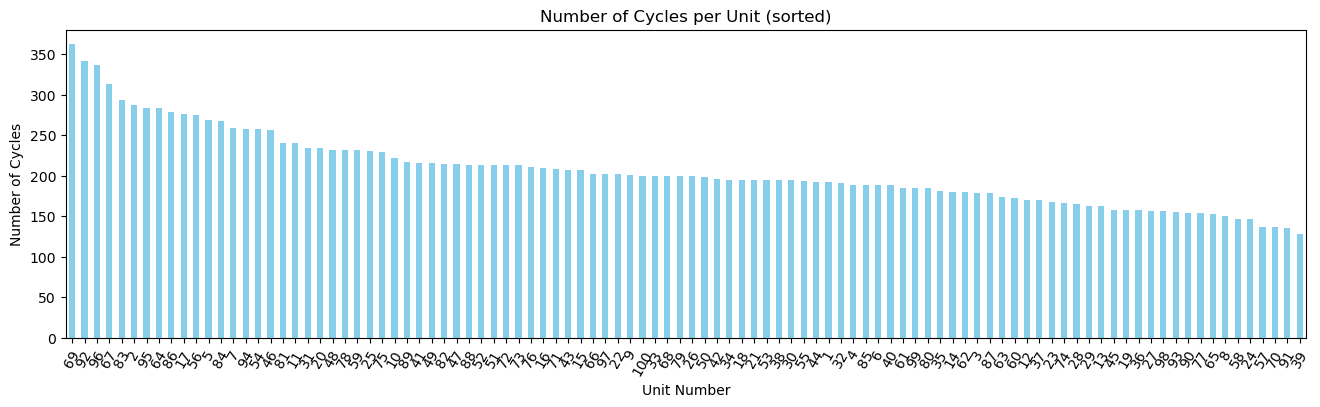

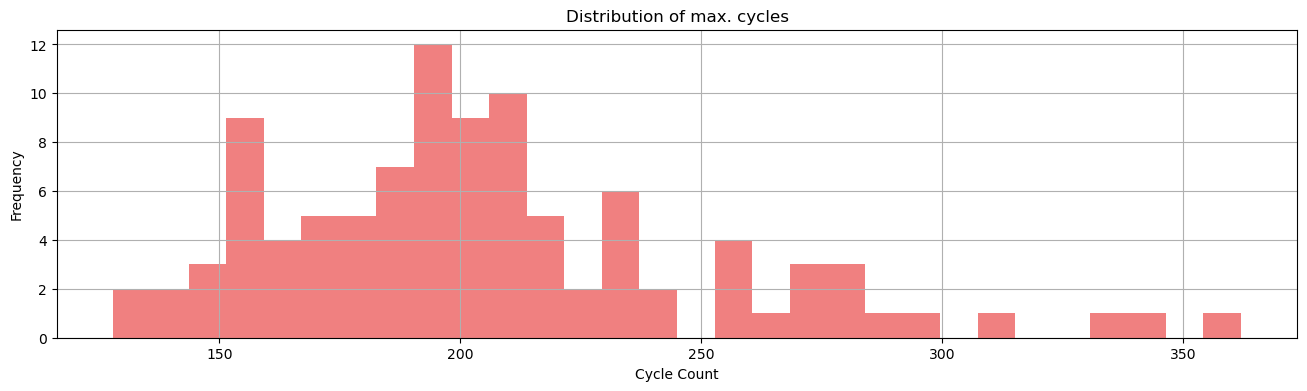

In [18]:
plot_cycles_per_unit(FD001_train)

In [19]:
# the goal is to predict the remaining time for each engine 
# and it will be usefull to add other columns with max cycles and life ratio for each unit

In [20]:
def add_max_cycle(df):
    unit_column = df.columns[0]
    cycle_column = df.columns[1]
    
    df['end_cycle'] = df.groupby(unit_column)[cycle_column].transform('max')
    df['life_ratio'] = df[cycle_column] / df['end_cycle']
    
    return df

In [21]:
add_max_cycle(FD001_train)

,unit number,cycle,setting 1,setting 2,setting 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,end_cycle,life_ratio
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000


In [22]:
# we can simplify our task by making it a classification task.
# if life_ration is below lets say 0.6 or 0.5 the engine is in a good chape class 0,
# if it is higher then 0.8 than it needs a maintenance (or at least give a warning) : class 2
# in between, lets call it a moderate condition : class 1

In [23]:
def classify_last_column(df):
    last_column = df.columns[-1]
    
    def classify(value):
        if value < 0.5:
            return 0
        elif value > 0.7:
            return 2
        else:
            return 1
    
    df['LR_class'] = df[last_column].apply(classify)
    
    return df

In [24]:
classify_last_column(FD001_train)

,unit number,cycle,setting 1,setting 2,setting 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,end_cycle,life_ratio,LR_class
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,0.005208,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,0.010417,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,0.015625,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,0.020833,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,0.026042,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,0.980000,2
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,0.985000,2
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,0.990000,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,0.995000,2


# EDA

In [26]:
# lets have a look at our data a bit more
# I want ot see a distribution for each column (but unit number, cycle and end_cycle)

In [27]:
def plot_histograms(data,bins=35):
    numerical_columns = data.select_dtypes(include=['number']).columns

    num_cols = len(numerical_columns)
    num_rows = (num_cols + 2) // 7
    
    # Create subplots
    fig, axes = plt.subplots(num_rows, 7, figsize=(15, 3 * num_rows))
    axes = axes.flatten()
    
    for i, column in enumerate(numerical_columns):
        sns.histplot(data[column], bins=bins, kde=False, ax=axes[i])
        axes[i].set_title(f'{column}')
    
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
        
    plt.tight_layout()
    plt.show()

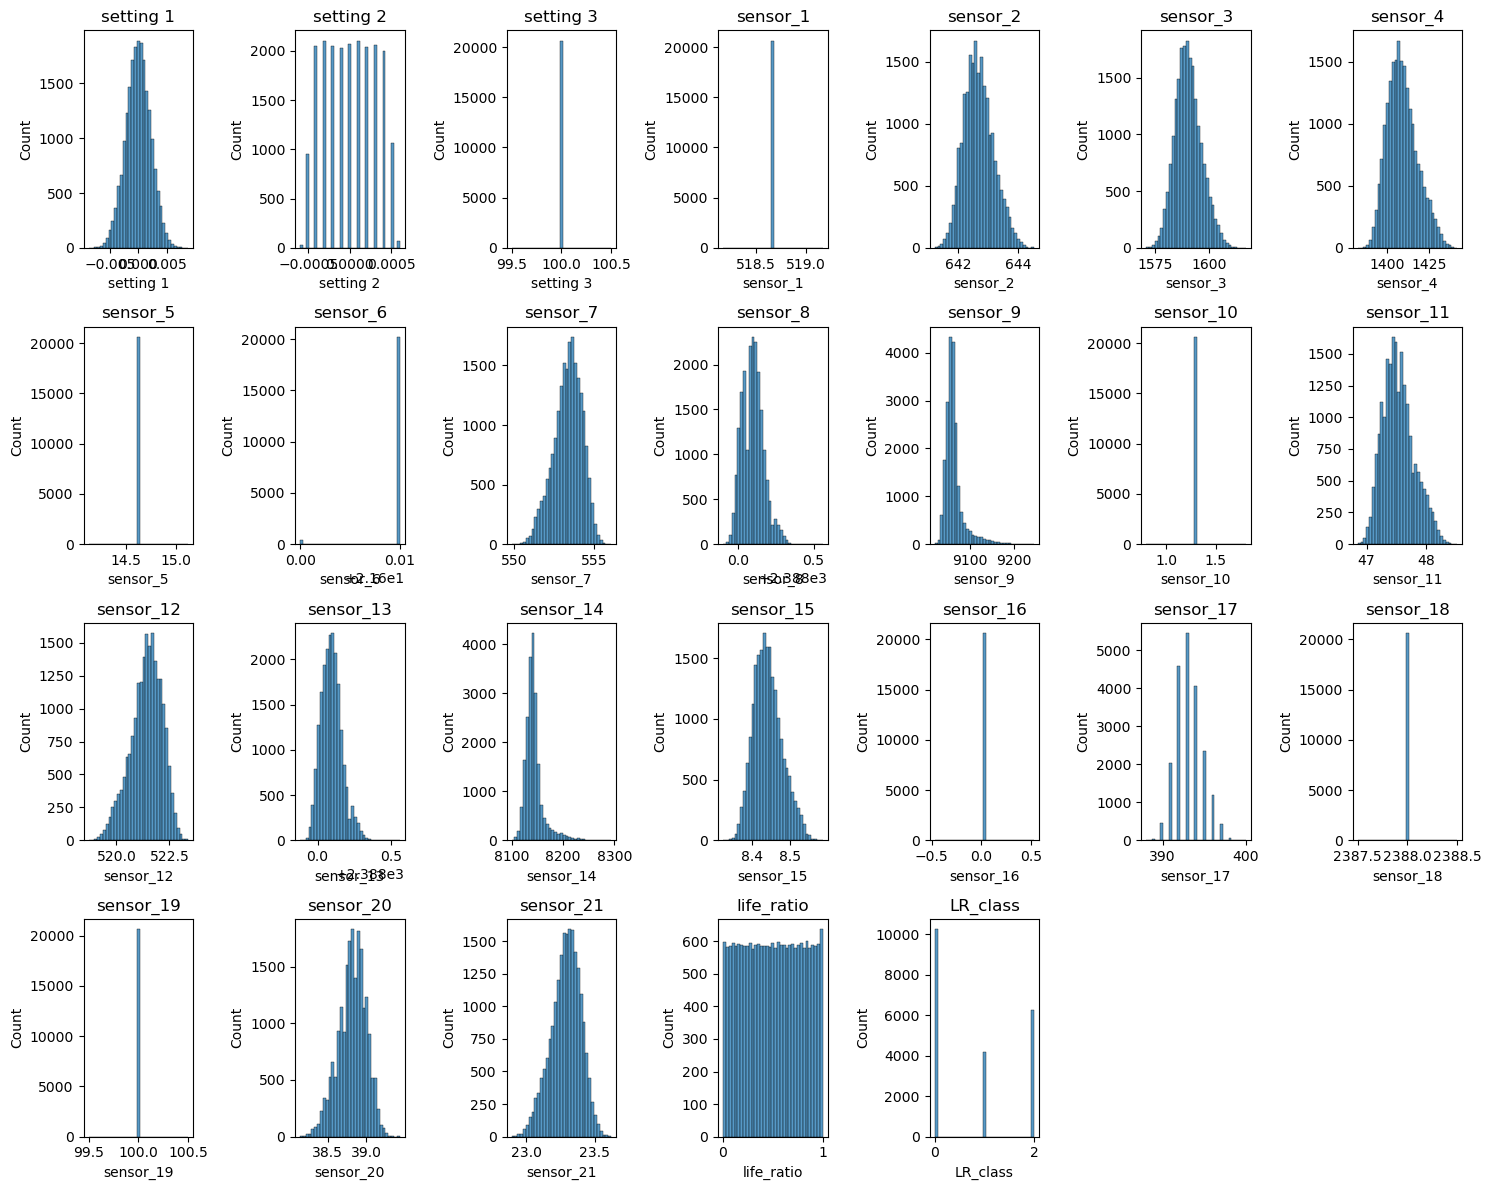

In [28]:
import seaborn as sns

plot_histograms(FD001_train.drop(['unit number','cycle','end_cycle'],axis=1))

In [29]:
# I can say that sensors with a single unique value dont have any predictive power and we can drop them,
# same for the setting columns

In [30]:
def remove_single_value_columns(df):
    columns_to_drop = [col for col in df.columns if df[col].nunique() == 1]
    df_cleaned = df.drop(columns=columns_to_drop,inplace=True)
    
    return df_cleaned

In [31]:
remove_single_value_columns(FD001_train)

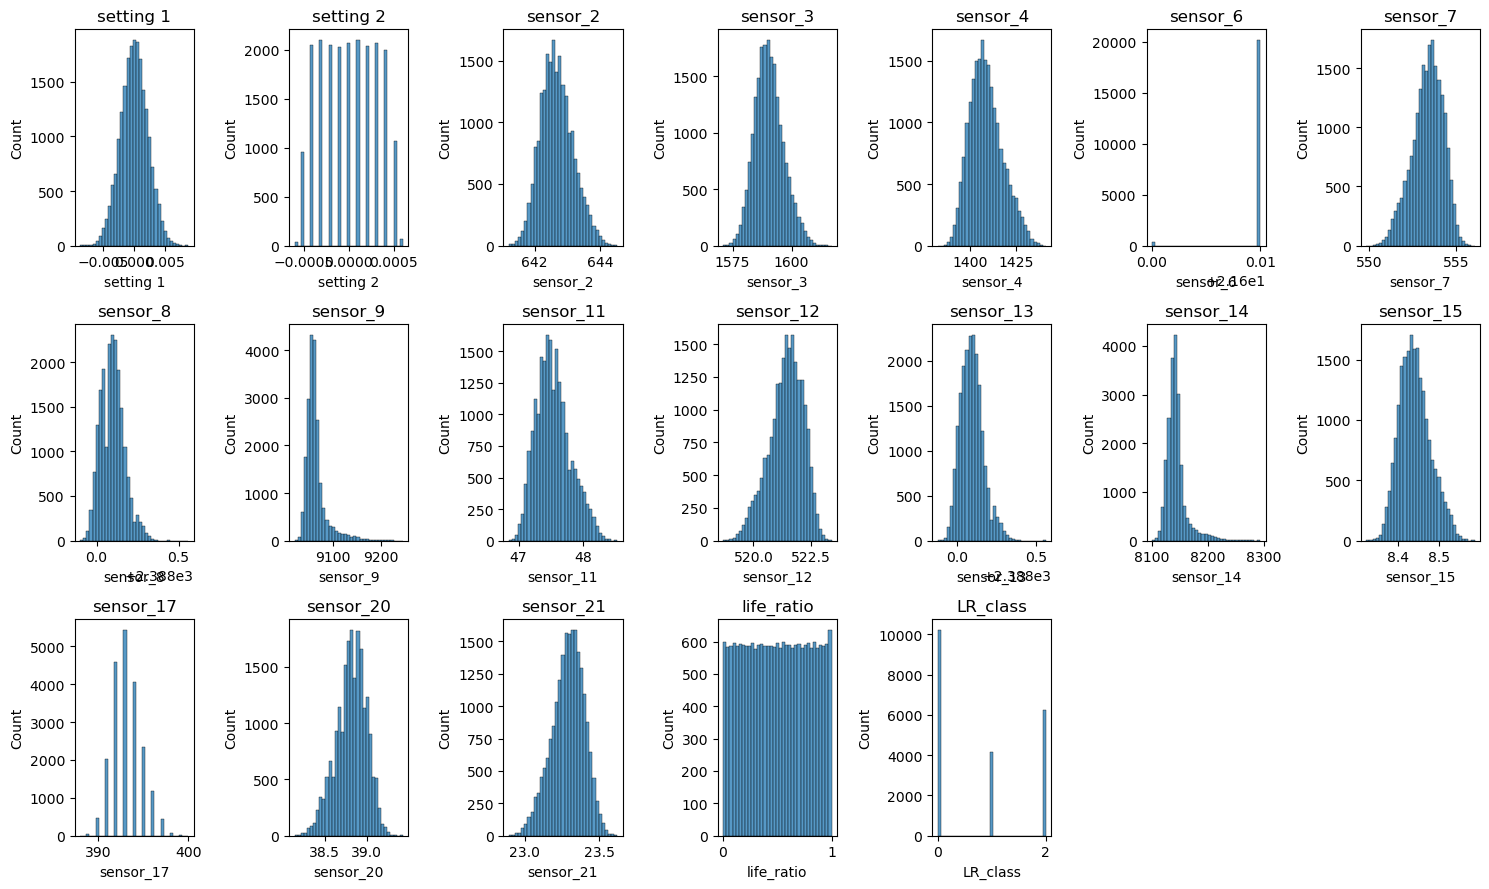

In [32]:
plot_histograms(FD001_train.drop(['unit number','cycle','end_cycle'],axis=1))

In [33]:
# before I continue with data prep I want to drop unit number,cycle and end_cycle 
# (if we need them I can always return them) 

In [34]:
FD001_train.drop(['unit number','cycle','end_cycle'],axis=1,inplace=True)

In [35]:
FD001_train.head()

,setting 1,setting 2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,life_ratio,LR_class
0,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8138.62,8.4195,392,39.06,23.4190,0.005208,0
1,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8131.49,8.4318,392,39.00,23.4236,0.010417,0
2,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8133.23,8.4178,390,38.95,23.3442,0.015625,0
3,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8133.83,8.3682,392,38.88,23.3739,0.020833,0
4,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8133.80,8.4294,393,38.90,23.4044,0.026042,0


In [36]:
# do scaling to speed up the models (for some it is a necessary thing to do)

In [109]:
from sklearn.preprocessing import MinMaxScaler

def minmax_scale(df):
    df_scaled = df.copy()
    features = df_scaled.columns[1:-1]
    scaler = MinMaxScaler()
    df_scaled[features] = scaler.fit_transform(df_scaled[features])
    
    return df_scaled

In [38]:
FD001_train_scaled = minmax_scale(FD001_train)
FD001_train_scaled.head()

,setting 1,setting 2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21,life_ratio,LR_class
0,0.459770,0.166667,0.183735,0.406802,0.309757,1.0,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,0.002453,0
1,0.609195,0.250000,0.283133,0.453019,0.352633,1.0,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,0.007675,0
2,0.252874,0.750000,0.343373,0.369523,0.370527,1.0,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,0.012898,0
3,0.540230,0.500000,0.343373,0.256159,0.331195,1.0,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,0.018121,0
4,0.390805,0.333333,0.349398,0.257467,0.404625,1.0,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,0.023344,0


In [39]:
# lets create a function that does all previous steps for all data and saves results in .csv files for futur model train

In [111]:
import os

def data_preproccesing(directory_path):
    for file_name in os.listdir(directory_path):
        if file_name.endswith('.txt'):
            file_path = os.path.join(directory_path, file_name)
            
            df = pd.read_csv(file_path,sep=' ',header=None)
            print(f"Processing file: {file_name}")
            
            column_names = ['unit number','cycle',
                'setting 1','setting 2','setting 3'] # creates a list of column names
            for i in range(1,df.shape[1]-4):
                column_names.append(f'sensor_{i}')
            
            df = rename_columns(df, column_names) # renaming columns
            df = df.dropna(axis=1, how='all') # delete empty columns
            df = add_max_cycle(df) # adds max life and life ratio for each unit
            df = classify_last_column(df) # classification of Life ratio column
            remove_single_value_columns(df) # removes single value columns (no predictive power)
            df.drop(['end_cycle','life_ratio'],axis=1,inplace=True)
            df = minmax_scale(df) # scaling non categorical features

            output_file = os.path.join(directory_path, f"processed_{file_name}")
            df.to_csv(output_file, index=False)
            
            print(f"Saved processed data to: {output_file}")

In [113]:
data_preproccesing('./data/nasa_turbofan/')

Processing file: test_FD001.txt
Saved processed data to: ./data/nasa_turbofan/processed_test_FD001.txt
Processing file: test_FD002.txt
Saved processed data to: ./data/nasa_turbofan/processed_test_FD002.txt
Processing file: test_FD003.txt
Saved processed data to: ./data/nasa_turbofan/processed_test_FD003.txt
Processing file: test_FD004.txt
Saved processed data to: ./data/nasa_turbofan/processed_test_FD004.txt
Processing file: train_FD001.txt
Saved processed data to: ./data/nasa_turbofan/processed_train_FD001.txt
Processing file: train_FD002.txt
Saved processed data to: ./data/nasa_turbofan/processed_train_FD002.txt
Processing file: train_FD003.txt
Saved processed data to: ./data/nasa_turbofan/processed_train_FD003.txt
Processing file: train_FD004.txt
Saved processed data to: ./data/nasa_turbofan/processed_train_FD004.txt


In [115]:
pd.read_csv('./data/nasa_turbofan/processed_test_FD002.txt').head()

,unit number,cycle,setting 1,setting 2,setting 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,LR_class
0,1,0.000000,0.238019,0.297150,1.0,0.597937,0.639243,0.691329,0.680395,0.617180,...,0.995085,0.670742,0.117564,1.0,0.694737,0.854123,1.0,0.625944,0.630724,0
1,1,0.002732,0.476162,0.831354,1.0,0.626985,0.664861,0.647519,0.534663,0.507937,...,0.994920,0.514944,0.337173,0.0,0.642105,0.864693,1.0,0.484214,0.496301,0
2,1,0.005464,0.833282,0.997625,1.0,0.060269,0.189055,0.312512,0.243225,0.146592,...,0.993898,0.514893,0.376695,0.0,0.315789,0.651163,1.0,0.164722,0.159476,0
3,1,0.008197,0.999967,0.998812,1.0,0.000000,0.135525,0.286753,0.242061,0.000000,...,0.993815,0.550269,0.394807,0.0,0.305263,0.627907,1.0,0.005834,0.016866,0
4,1,0.010929,0.595089,0.737886,0.0,0.238089,0.012028,0.022001,0.050986,0.293184,...,0.000718,0.036627,0.940070,0.0,0.021053,0.000000,0.0,0.141730,0.140123,0


# Feature extraction

In [131]:
def extract_features(df):
    feature_dfs = []

    for unit in df['unit number'].unique():
        unit_df = df[df['unit number'] == unit].copy()

        for col in unit_df.columns:
            if col.startswith('sensor'):
                unit_df[f'{col}_mean'] = unit_df[col].rolling(window=5, min_periods=1).mean()
                unit_df[f'{col}_std'] = unit_df[col].rolling(window=5, min_periods=1).std()

                unit_df[f'{col}_change_rate'] = unit_df[col].diff().fillna(0)

        feature_dfs.append(unit_df)

    feature_df = pd.concat(feature_dfs)
    
    return feature_df

In [133]:
X = pd.read_csv('./data/nasa_turbofan/processed_train_FD001.txt')
y = X.pop('LR_class')

In [139]:
X = extract_features(X)

# Model

In [142]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, stratify=y)

In [144]:
from sklearn.model_selection import cross_validate

metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-score'])

def calculate_classification_metrics(model, X, y):
    scoring = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
    results = cross_validate(model, X, y, cv=5, scoring=scoring, return_train_score=False)
    

    accuracy = results['test_accuracy'].mean()
    precision = results['test_precision_macro'].mean()
    recall = results['test_recall_macro'].mean()
    f1 = results['test_f1_macro'].mean()

    return accuracy, precision, recall, f1

In [146]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Decision Tree'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [150]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=101)

accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [154]:
from xgboost import XGBClassifier

model = XGBClassifier()
accuracy, precision, recall, f1 = calculate_classification_metrics(model,X_train,y_train)
metrics_df = pd.concat([metrics_df, pd.DataFrame({'Model': ['XGBoost'], 'Accuracy': [accuracy], 
                                                  'Precision': [precision], 'Recall': [recall], 
                                                  'F1-score': [f1]})], ignore_index=True)

In [156]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-score
0,Decision Tree,0.905841,0.883116,0.881189,0.882062
1,Random Forest,0.913173,0.89123,0.892781,0.891757
2,XGBoost,0.961343,0.951098,0.951871,0.951423


## Tune the best model

In [158]:
model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [160]:
predictions = model.predict(X_test)

In [162]:
from sklearn import metrics
from sklearn.metrics import classification_report

accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions,average='macro')
recall = metrics.recall_score(y_test, predictions,average='macro')
f1 = metrics.f1_score(y_test, predictions,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

Accuracy: 0.9741
Precision: 0.9682
Recall: 0.9663
F1-Score: 0.9672
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2049
           1       0.94      0.93      0.94       831
           2       0.98      0.98      0.98      1247

    accuracy                           0.97      4127
   macro avg       0.97      0.97      0.97      4127
weighted avg       0.97      0.97      0.97      4127



In [164]:
from sklearn.model_selection import GridSearchCV

def get_best_estimator(X_train, y_train, model, param_grid):
    
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy',verbose=3) 
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

In [166]:
from sklearn.model_selection import RandomizedSearchCV

def get_best_estimator_RandomSearch(X_train, y_train, model, param_grid):
    
    grid_search = RandomizedSearchCV(estimator=model,param_distributions=param_grid, cv=5, scoring='accuracy',verbose=3) 
    grid_search.fit(X_train, y_train)
    
    return grid_search.best_estimator_

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'min_child_weight': [1, 3, 5],
    'gamma': [0.01, 0.1, 0.3, 0.5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0, 1, 10],
}

In [168]:
best_model_random = get_best_estimator_RandomSearch(X_train,y_train,model,param_grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=0.947 total time=   1.4s
[CV 2/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=0.949 total time=   1.4s
[CV 3/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=0.944 total time=   1.4s
[CV 4/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=0.946 total time=   1.4s
[CV 5/5] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.1, max_depth=7, min_child_weight=3, n_estimators=100, reg_alpha=0.1, reg_lambda=1, subsample=0.8;, score=0.95

In [170]:
predictions = best_model_random.predict(X_test)

accuracy = metrics.accuracy_score(y_test, predictions)
precision = metrics.precision_score(y_test, predictions,average='macro')
recall = metrics.recall_score(y_test, predictions,average='macro')
f1 = metrics.f1_score(y_test, predictions,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print('=====================================================')
print(classification_report(y_test,predictions))

Accuracy: 0.9627
Precision: 0.9536
Recall: 0.9521
F1-Score: 0.9528
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2049
           1       0.91      0.90      0.91       831
           2       0.97      0.97      0.97      1247

    accuracy                           0.96      4127
   macro avg       0.95      0.95      0.95      4127
weighted avg       0.96      0.96      0.96      4127



In [172]:
def get_feature_importance(X_val, model):
    if hasattr(model, 'feature_importances_'):
        importances = model.feature_importances_
        
        feature_importance_df = pd.DataFrame({
            'Feature': X_val.columns,
            'Importance': importances
        })
        
        feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)
        
        return feature_importance_df
    else:
        raise ValueError("The provided model does not support feature importances.")

In [174]:
get_feature_importance(X_test, best_model_random)

,Feature,Importance
0,cycle,0.230640
1,sensor_15_mean,0.098328
2,sensor_11_mean,0.040931
3,sensor_4_mean,0.039902
4,sensor_7_mean,0.038491
...,...,...
59,sensor_15_change_rate,0.003485
60,sensor_17_change_rate,0.002467
61,sensor_6,0.000000
62,sensor_6_change_rate,0.000000


In [68]:
# lets test our model on a suggested test data:

In [176]:
FD001_test = pd.read_csv('./data/nasa_turbofan/processed_test_FD001.txt')
FD001_test.drop(['LR_class'],axis=1,inplace=True)
FD001_test.head()

,unit number,cycle,setting 1,setting 2,sensor_2,sensor_3,sensor_4,sensor_6,sensor_7,sensor_8,sensor_9,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_17,sensor_20,sensor_21
0,1,0.000000,0.65625,0.692308,0.596215,0.421968,0.282214,1.0,0.608871,0.365854,0.196475,0.273973,0.534247,0.325581,0.152259,0.347076,0.375,0.500000,0.620099
1,1,0.003311,0.34375,0.230769,0.182965,0.504025,0.225240,1.0,0.800403,0.292683,0.229042,0.479452,0.634703,0.395349,0.277907,0.227709,0.500,0.645455,0.645718
2,1,0.006623,0.53125,0.538462,0.419558,0.464814,0.346130,1.0,0.651210,0.390244,0.248506,0.479452,0.591324,0.325581,0.192892,0.533557,0.500,0.700000,0.681104
3,1,0.009934,0.77500,0.461538,0.413249,0.391587,0.449867,1.0,0.643145,0.341463,0.159080,0.328767,0.456621,0.372093,0.217896,0.282359,0.250,0.627273,0.620382
4,1,0.013245,0.60000,0.461538,0.435331,0.471306,0.357974,1.0,0.661290,0.292683,0.153410,0.349315,0.632420,0.325581,0.187891,0.337009,0.125,0.618182,0.676008


In [182]:
FD001_test = extract_features(FD001_test)

In [184]:
predictions = best_model_random.predict(FD001_test)

In [186]:
pd.DataFrame(predictions)

,0
0,0
1,0
2,0
3,0
4,0
...,...
13091,2
13092,2
13093,2
13094,2


In [73]:
# lets check if it is correct
# we have a data that tells us life time in cycles for each unit for this test (it will be our max_cycle)

In [188]:
FD001_test = pd.read_csv('./data/nasa_turbofan/test_FD001.txt',sep=' ', header=None)

In [190]:
column_names = ['unit number','cycle',
                'setting 1','setting 2','setting 3'] # creates a list of column names
for i in range(1,FD001_test.shape[1]-4):
    column_names.append(f'sensor_{i}')

FD001_test = rename_columns(FD001_test, column_names) # renaming columns
FD001_test = FD001_test.dropna(axis=1, how='all') # delete empty columns
add_max_cycle(FD001_test)

C:\Users\druzh\AppData\Local\Temp\ipykernel_30960\2927117651.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['end_cycle'] = df.groupby(unit_column)[cycle_column].transform('max')


,unit number,cycle,setting 1,setting 2,setting 3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,end_cycle,life_ratio
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,...,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,0.032258
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,...,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,0.064516
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,...,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,0.096774
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,...,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,0.129032
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,...,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,0.161290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,...,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,0.979798
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,...,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,0.984848
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,...,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,0.989899
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,...,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,0.994949


In [192]:
FD001_test_RUL = pd.read_csv('./data/nasa_turbofan/RUL/RUL_FD001.txt',header=None)

In [194]:
def get_real_life_ratio(df, end_cycle_df):
    unit_col = df.columns[0]
    end_cycle = df.columns[-2]
    
    # df['real_end_cycle'] 

    end_cycle_df['unit number'] = end_cycle_df.index + 1
    df_2 = df.merge(end_cycle_df, on='unit number')
    df_2['real_end_cycle'] = df[end_cycle] + df_2[df_2.columns[-1]]
    df_2.drop(['unit number','life_ratio','end_cycle',df_2.columns[-2]],axis=1,inplace=True)
    df_2.rename(columns={'real_end_cycle':'end_cycle'},inplace=True)
    df_2['life_ratio'] = df_2[df.columns[1]] / df_2['end_cycle'] 
    # df = df.drop(columns=['end_cycle_from_end_cycle_df'])

    return df_2

In [196]:
FD001_test = get_real_life_ratio(FD001_test,FD001_test_RUL)

In [198]:
FD001_test = classify_last_column(FD001_test)

In [200]:
y_true = FD001_test.iloc[:,-1]

In [202]:
accuracy = metrics.accuracy_score(y_true, predictions)
precision = metrics.precision_score(y_true, predictions,average='macro')
recall = metrics.recall_score(y_true, predictions,average='macro')
f1 = metrics.f1_score(y_true, predictions,average='macro')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print('=====================================================')
print(classification_report(y_true,predictions))

Accuracy: 0.6058
Precision: 0.4807
Recall: 0.6077
F1-Score: 0.4728
              precision    recall  f1-score   support

           0       1.00      0.66      0.80      9556
           1       0.14      0.17      0.15      2338
           2       0.31      0.99      0.47      1202

    accuracy                           0.61     13096
   macro avg       0.48      0.61      0.47     13096
weighted avg       0.78      0.61      0.65     13096



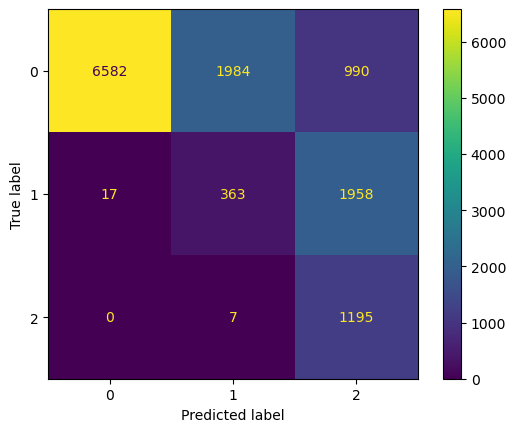

In [82]:
conf_matrix = confusion_matrix(y_true, predictions)
ConfusionMatrixDisplay(conf_matrix, display_labels=None).plot()

# Results:

XGBoost clssification model predicts warning situations with 48% accuracy, and majority of uncertainaty is related to missclassification with class 1.

# Regression
lets make RUL predictions